In [2]:
! pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\khush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("breast_cancer_survival.csv")

print(df.head())
print(df.info())

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [7]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [12]:
df.columns= df.columns.str.lower().str.replace(" ", "_")


# CONVERT NUMERIC COLUMNS 
numeric_columns= ["age", "protein1", "protein2", "protein3", "protein4"]
for col in numeric_columns:
    df[col]= pd.to_numeric(df[col], errors="coerce")
    
    
# CONVERT DATES 
df["date_of_surgery"]= pd.to_datetime(df["date_of_surgery"], errors="coerce")
df["date_of_last_visit"]= pd.to_datetime(df["date_of_last_visit"], errors="coerce")


# CALCULATE SURVIVAL DATES 
df["survival_days"]= (df["date_of_last_visit"] - df["date_of_surgery"]).dt.days


# STATUS OF PATIENT
df["patient_status"] = df["patient_status"].str.lower().str.strip()


# HANDLING NULL VALUES
df=df.dropna(subset=["survival_days", "date_of_last_visit", "patient_status"])



    

    


tumour_stage
III    365.350649
II     449.866667
I      547.283333
Name: survival_days, dtype: float64


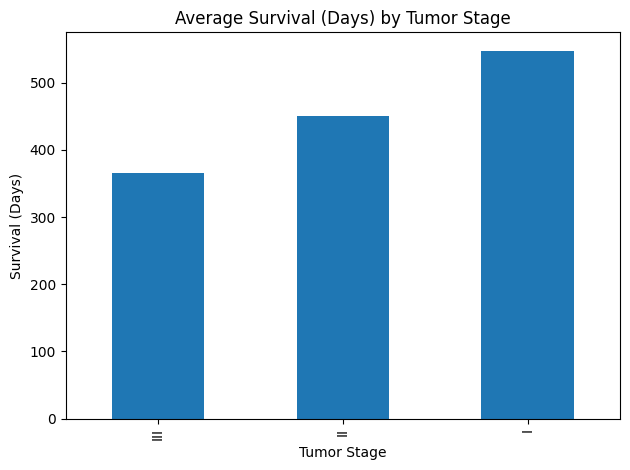

In [ ]:
# VISUALIZATION BY AVERAGE SURVIVAL DAYS BY TUMOuR STAGE

stage_survival= df.groupby("tumour_stage")["survival_days"].mean().sort_values()
print(stage_survival)

plt.figure()
stage_survival.plot(kind="bar")
plt.title("Average Survival (Days) by Tumor Stage")
plt.xlabel("Tumor Stage")
plt.ylabel("Survival (Days)")
plt.tight_layout()
plt.show()



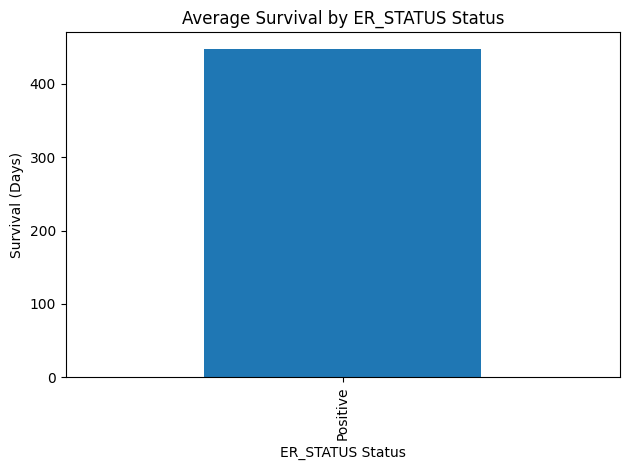

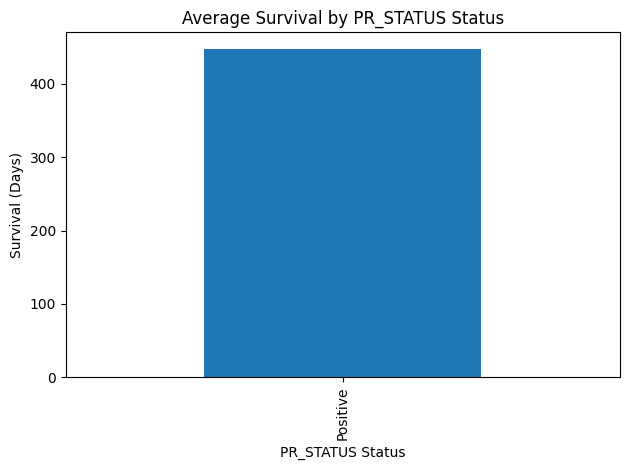

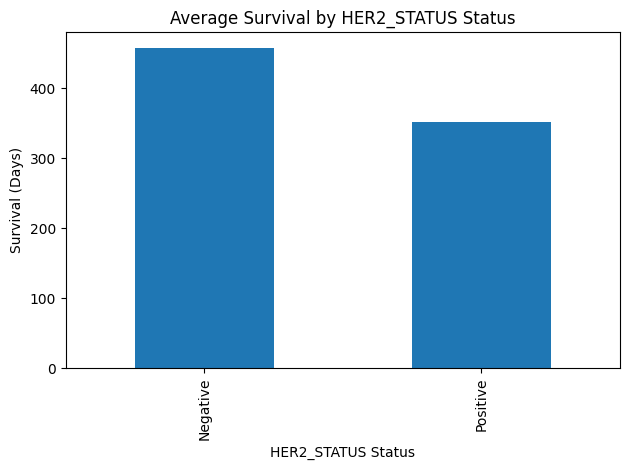

In [24]:
# VISUALIZATION BY AVERAGE SURVIVAL DAYS BY RECEPTOR STATUS (ER/PR/HER2)
for receptor in ["er_status", "pr_status", "her2_status"]:
    survival= df.groupby(receptor)["survival_days"].mean()
    plt.figure()
    survival.plot(kind="bar")
    plt.title(f"Average Survival by {receptor.upper()} Status")
    plt.xlabel(f"{receptor.upper()} Status")
    plt.ylabel("Survival (Days)")
    plt.tight_layout()
    plt.show()


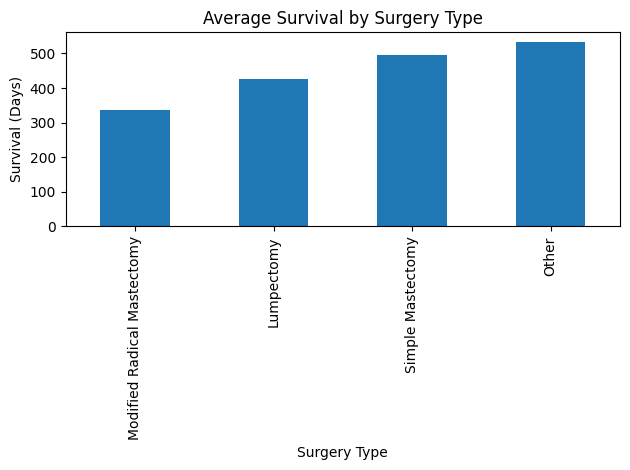

In [28]:
# VISUALIZATION BY AVERAGE SURVIVAL DAYS BY SURGERY TYPE 
surgery_survival=df.groupby("surgery_type")["survival_days"].mean().sort_values()

plt.figure()
surgery_survival.plot(kind="bar")
plt.title("Average Survival by Surgery Type")
plt.xlabel("Surgery Type")
plt.ylabel("Survival (Days)")
plt.tight_layout()
plt.show()


In [29]:
# PROTEIN EXPRESSION V/S SURVIVAL(CORRELATION)
protein_cols= ["protein1", "protein2", "protein3", "protein4"]
corr= df[protein_cols + ["survival_days"]].corr()["survival_days"].sort_values(ascending=False)
print(corr)


survival_days    1.000000
protein3         0.005075
protein2        -0.012155
protein1        -0.023321
protein4        -0.125863
Name: survival_days, dtype: float64


In [30]:
df.head()

,age,gender,protein1,protein2,protein3,protein4,tumour_stage,histology,er_status,pr_status,her2_status,surgery_type,date_of_surgery,date_of_last_visit,patient_status,survival_days
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-05-20,2018-08-26,alive,98
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-04-26,2019-01-25,dead,274
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2018-08-24,2020-04-08,alive,593
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-16,2020-07-28,alive,620
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2018-12-12,2019-01-05,alive,24


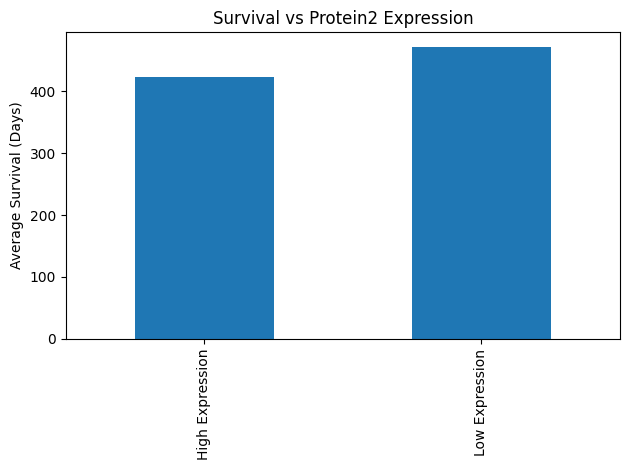

In [31]:
# HIGH V/S LOW PROTEIN EXPRESSION 
protein = "protein2"  ## can take any protein out of 4

median_val = df[protein].median()

high= df[df[protein]>= median_val]
low= df[df[protein]< median_val]

plt.figure()
pd.Series({"High Expression": high["survival_days"].mean(),
           "Low Expression": low["survival_days"].mean()}).plot(kind="bar")

plt.title(f"Survival vs {protein.capitalize()} Expression")
plt.ylabel("Average Survival (Days)")
plt.tight_layout()
plt.show()



In [32]:
df.head()


,age,gender,protein1,protein2,protein3,protein4,tumour_stage,histology,er_status,pr_status,her2_status,surgery_type,date_of_surgery,date_of_last_visit,patient_status,survival_days
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-05-20,2018-08-26,alive,98
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-04-26,2019-01-25,dead,274
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2018-08-24,2020-04-08,alive,593
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-16,2020-07-28,alive,620
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2018-12-12,2019-01-05,alive,24


<Axes: title={'center': 'Survival by Molecular Subtype'}, xlabel='molecular_subtype'>

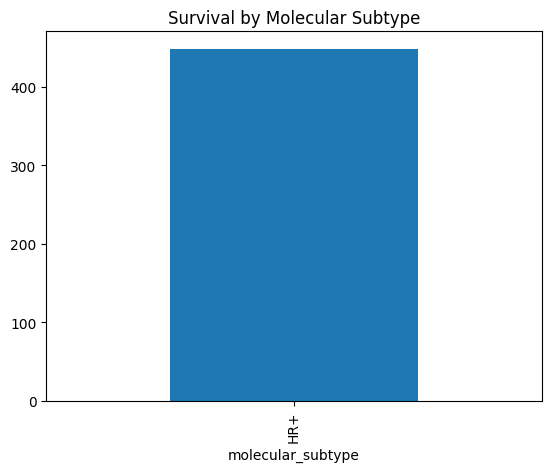

In [34]:
# MOLECULAR SUBTYPE
def subtype(row):
    er, pr, her2= row["er_status"], row["pr_status"], row["her2_status"]
    if er == "Positive" or pr == "Positive":
        return "HR+"
    if her2 == "Positive":
        return "HER2+"
    if er == "Negative" and pr == "Negative" and her2 == "Negative":
        return "TNBC (Triple Negative Breast Cancer)"
    return "Other"

df["molecular_subtype"] = df.apply(subtype, axis=1)

sub_survival= df.groupby("molecular_subtype")["survival_days"].mean()

sub_survival.plot(kind="bar", title="Survival by Molecular Subtype")

<Axes: title={'center': 'Correlation with survival time'}>

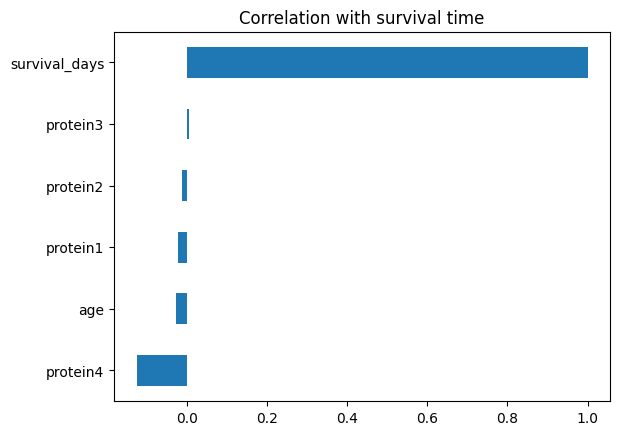

In [36]:
# Factors which matters the most
features= ["age", "protein1", "protein2", "protein3", "protein4"]
important= df[features+ ["survival_days"]].corr()["survival_days"].sort_values()

important.plot(kind="barh", title="Correlation with survival time")

<Axes: title={'center': 'Tumor Stage Distribution'}, xlabel='tumour_stage'>

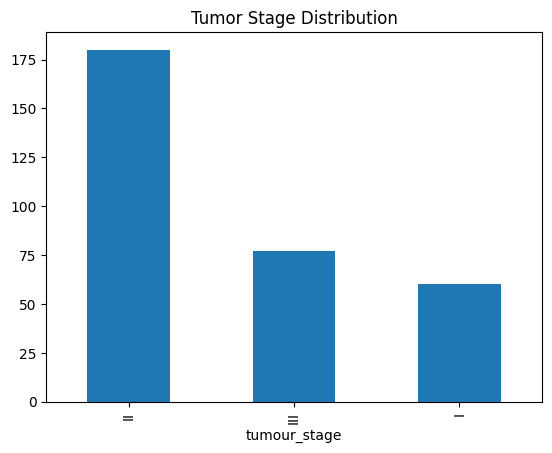

In [ ]:
# VISUALIZATION OF TUMOR STAGE DISTRIBUTION
df["tumour_stage"].value_counts().plot(kind="bar", title="Tumour Stage Distribution")


In [42]:
summary = {
    "Total Patients": len(df),
    "Mean Age": df["age"].mean(),
    "Median Age": df["age"].median(),
    "Most Common Stage": df["tumour_stage"].value_counts().idxmax(),
    "Most Common Subtype": df["molecular_subtype"].value_counts().idxmax(),
    "Most Common Surgery": df["surgery_type"].value_counts().idxmax()
}

summary_df = pd.DataFrame.from_dict(summary, orient="index", columns=["Value"])
print(summary_df)


                         Value
Total Patients             317
Mean Age             58.725552
Median Age                58.0
Most Common Stage           II
Most Common Subtype        HR+
Most Common Surgery      Other
